In [299]:
# Importa las bibliotecas necesarias
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import scipy.signal as signal
import cftime
import netCDF4 as nc
import pandas as pd
import datetime as dt
import scipy
from scipy.stats import linregress


In [300]:
import seaborn as sns
from scipy.stats import norm
import seaborn as sns
from scipy.stats import norm


In [301]:
sh=nc.Dataset('C:\\Users\\Janus\\Downloads\\2001.nc','r')
sh2=nc.Dataset('C:\\Users\\Janus\\Downloads\\2011.nc','r')


In [302]:
print(shw)

[1.34135228 1.34142624 1.3366432  ... 0.77567097 0.77535046 0.77638596]


In [303]:
shw = sh.variables['swh'][:,0,0,].flatten()  #tener mucho cuidado de donde estan los datos y como estan, aplanar si es necesarip
shw2 = sh2.variables['swh'][:,:,0,].flatten()


In [304]:
shww=xr.open_dataset('C:\\Users\\Janus\\Downloads\\2001.nc',engine='scipy') #scipy ya te lo da en formato datetime
shww2=xr.open_dataset('C:\\Users\\Janus\\Downloads\\2011.nc',engine='scipy')

In [305]:
fechasi = shww['time']
fechasi2 = shww2['time']
fechas = pd.DataFrame(fechasi.values, columns=['fecha'])
fechas2 = pd.DataFrame(fechasi2.values, columns=['fecha'])
#cosas basicas de pandas, tener cuidado con los indices, 
ssat = pd.DataFrame(shw, columns=['swh'])
ssat2 = pd.DataFrame(shw2, columns=['swh'])

serie = pd.concat([ssat, fechas], axis=1)
serie2 = pd.concat([ssat2, fechas2], axis=1)
seriec = pd.concat([serie, serie2], axis=0, ignore_index=True)

print(seriec)

             swh               fecha
0       1.341352 2001-01-01 00:00:00
1       1.341426 2001-01-01 01:00:00
2       1.336643 2001-01-01 02:00:00
3       1.327126 2001-01-01 03:00:00
4       1.315243 2001-01-01 04:00:00
...          ...                 ...
175315  0.825157 2020-12-31 19:00:00
175316  0.839079 2020-12-31 20:00:00
175317  0.845703 2020-12-31 21:00:00
175318  0.824457 2020-12-31 22:00:00
175319  0.824080 2020-12-31 23:00:00

[175320 rows x 2 columns]


In [306]:
seriec['tiempo'] = (seriec['fecha'] - seriec['fecha'].min()).dt.total_seconds()
print(seriec)

             swh               fecha       tiempo
0       1.341352 2001-01-01 00:00:00          0.0
1       1.341426 2001-01-01 01:00:00       3600.0
2       1.336643 2001-01-01 02:00:00       7200.0
3       1.327126 2001-01-01 03:00:00      10800.0
4       1.315243 2001-01-01 04:00:00      14400.0
...          ...                 ...          ...
175315  0.825157 2020-12-31 19:00:00  631134000.0
175316  0.839079 2020-12-31 20:00:00  631137600.0
175317  0.845703 2020-12-31 21:00:00  631141200.0
175318  0.824457 2020-12-31 22:00:00  631144800.0
175319  0.824080 2020-12-31 23:00:00  631148400.0

[175320 rows x 3 columns]


In [307]:
slope, intercept, _, _, _ = linregress(seriec['tiempo'], seriec['swh'])
tendencia = intercept + slope * seriec['tiempo']

In [308]:
YO = seriec['swh'].values
YOm = np.mean(YO) 
YOm = YOm - np.mean(YOm)  
Yclimatologico = YOm
YOM = np.tile(YOm, len(YO))
Y = YO
yf = Y - np.mean(Y)
X = np.arange(len(Y))
seriec['mes'] = seriec['fecha'].dt.month
promedio_climatologico = seriec.groupby('mes')['swh'].transform('mean')

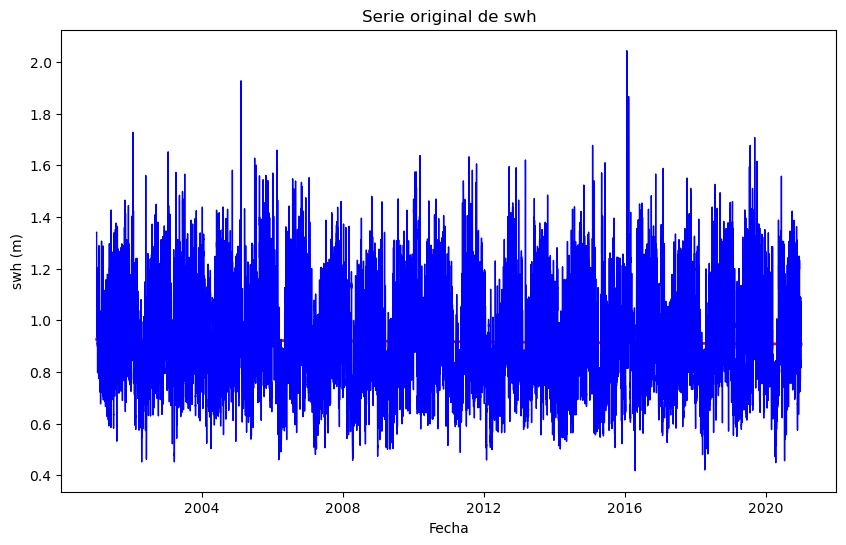

In [309]:
# Graficar la serie original
plt.figure(figsize=(10, 6))
plt.plot(seriec['fecha'],tendencia,color='r',linewidth=2)
plt.plot(seriec['fecha'], Y,color='b',linewidth=1)
plt.xlabel('Fecha')
plt.ylabel('swh (m)')
plt.title('Serie original de swh')
plt.show()

Text(0.5, 1.0, 'Ciclo estacional de swh sin tendencia y sin media')

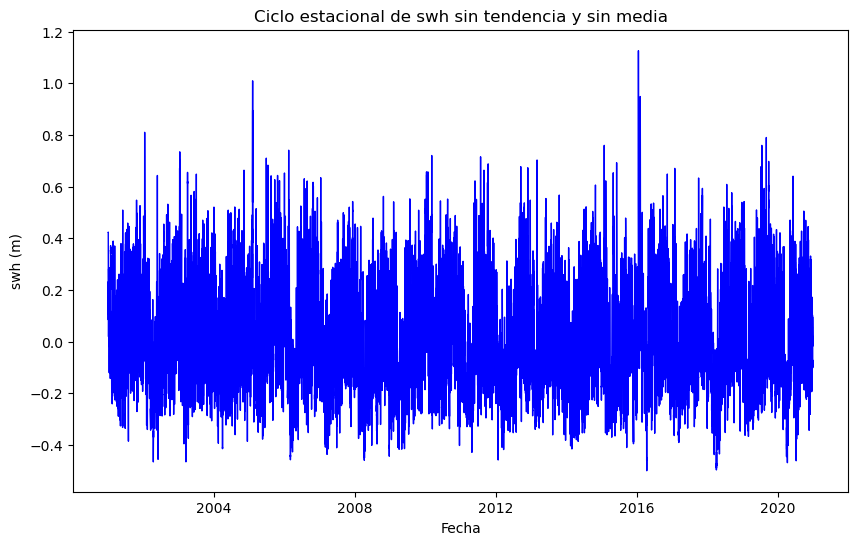

In [310]:
plt.figure(figsize=(10, 6))
plt.plot(seriec['fecha'], yf, color='b', linewidth=1)
plt.xlabel('Fecha')
plt.ylabel('swh (m)')
plt.title('Ciclo estacional de swh sin tendencia y sin media')

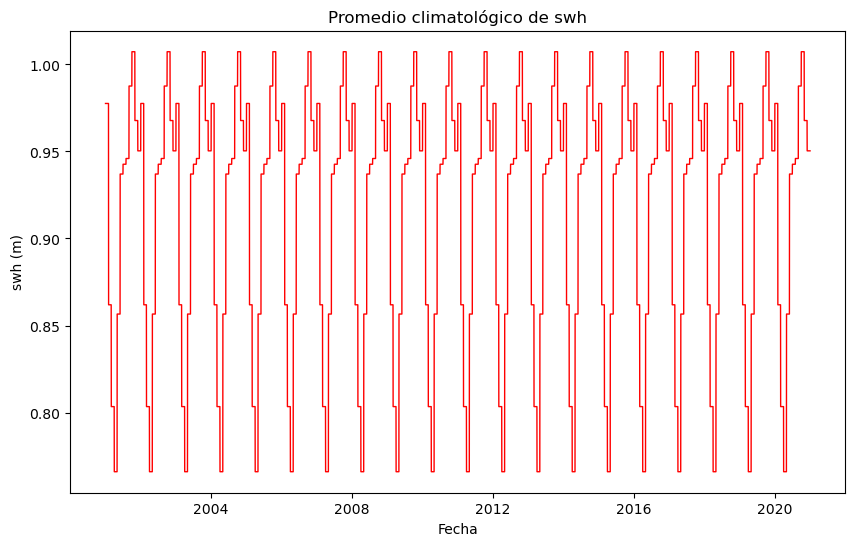

In [311]:
# Graficar el promedio climatológico de sst
plt.figure(figsize=(10, 6))
plt.plot(seriec['fecha'], promedio_climatologico, color='r', linewidth=1)
plt.xlabel('Fecha')
plt.ylabel('swh (m)')
plt.title('Promedio climatológico de swh')
plt.show()

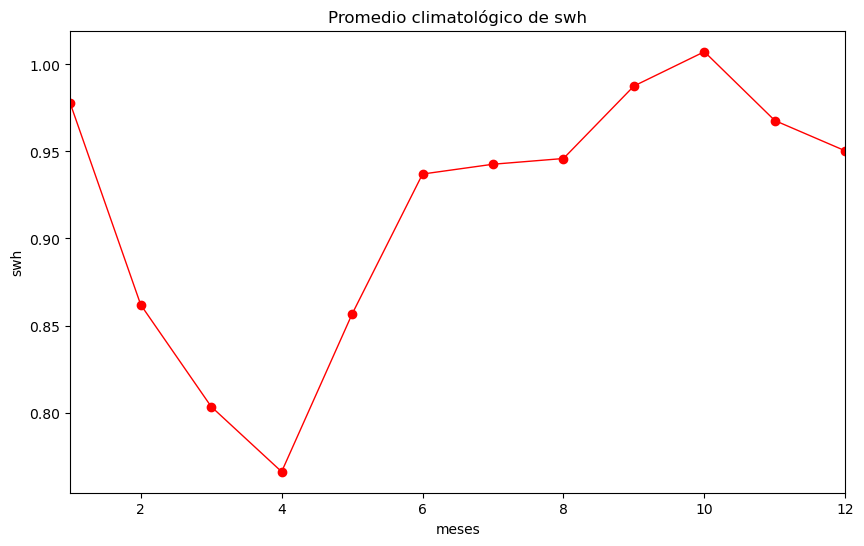

In [312]:
seriec['promedio_climatologico']=promedio_climatologico
seriec['mes'] = seriec['fecha'].dt.month
datos_por_mes = seriec.groupby('mes')['promedio_climatologico'].first()
plt.figure(figsize=(10, 6))
plt.plot(datos_por_mes.index, datos_por_mes.values, color='r', linewidth=1,marker='o')
plt.xlabel('meses')
plt.ylabel('swh')
plt.title('Promedio climatológico de swh')
plt.xlim(1,12)
plt.show()

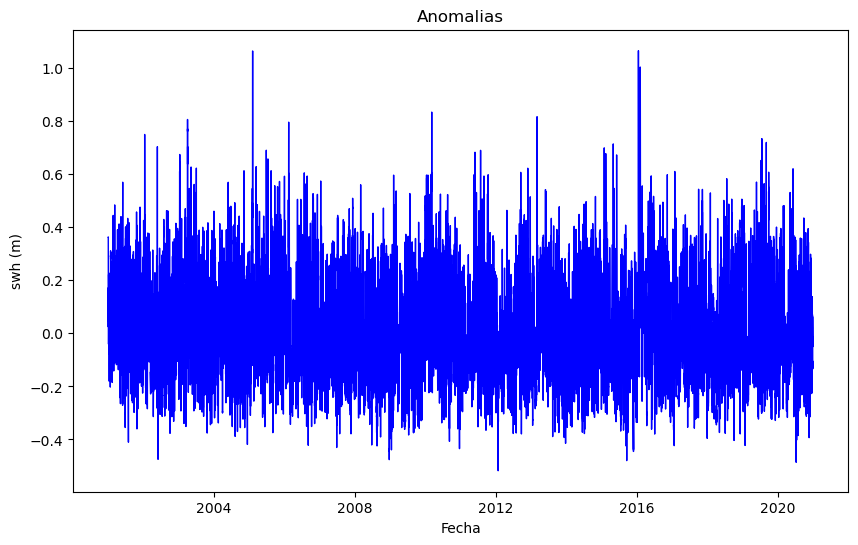

In [313]:
anomalia=seriec['swh']-promedio_climatologico
plt.figure(figsize=(10, 6))
plt.plot(seriec['fecha'], anomalia, color='b', linewidth=1)
plt.xlabel('Fecha')
plt.ylabel('swh (m)')
plt.title('Anomalias')
plt.show()

In [314]:
seriee=seriec#cree otra serie porque es necesario indexar la fecha pero una vez indexada no la puedes llamar y operar en pandas
seriee['fecha'] = pd.to_datetime(seriec['fecha'])
seriee.set_index('fecha', inplace=True)
promedio_diario = seriee['swh'].resample('1D').mean()
promedio_mensual = seriee['swh'].resample('1M').mean()
promedio_anual = seriee['swh'].resample('1Y').mean()

In [315]:
promedio_anual_diario = promedio_diario.resample('Y').mean()
promedio_anual_mensual = promedio_mensual.resample('Y').mean()
incremento_anual_diario = promedio_anual_diario.diff()
incremento_anual_mensual = promedio_anual_mensual.diff()



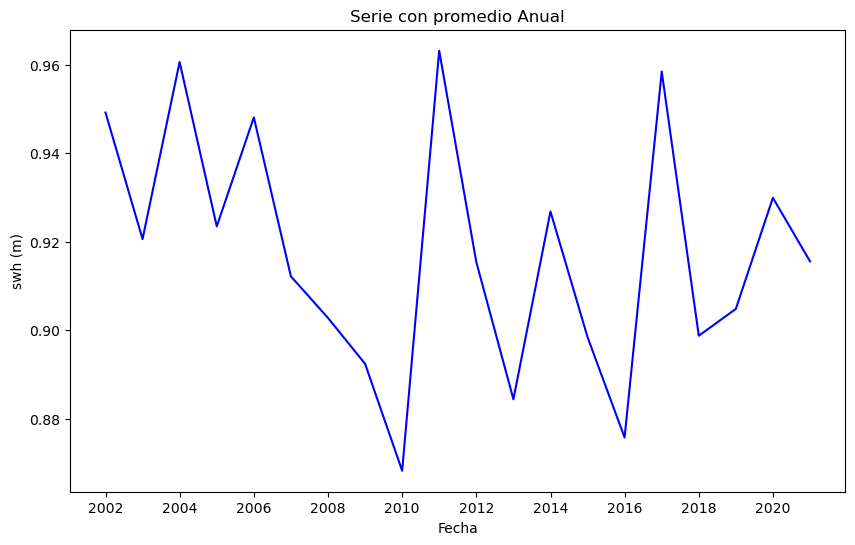

In [316]:
plt.figure(figsize=(10, 6))
plt.plot(promedio_anual.index, promedio_anual.values, label='Promedio Anual', color='blue')
plt.xlabel('Fecha')
plt.ylabel('swh (m)')
plt.title('Serie con promedio Anual')
plt.show()

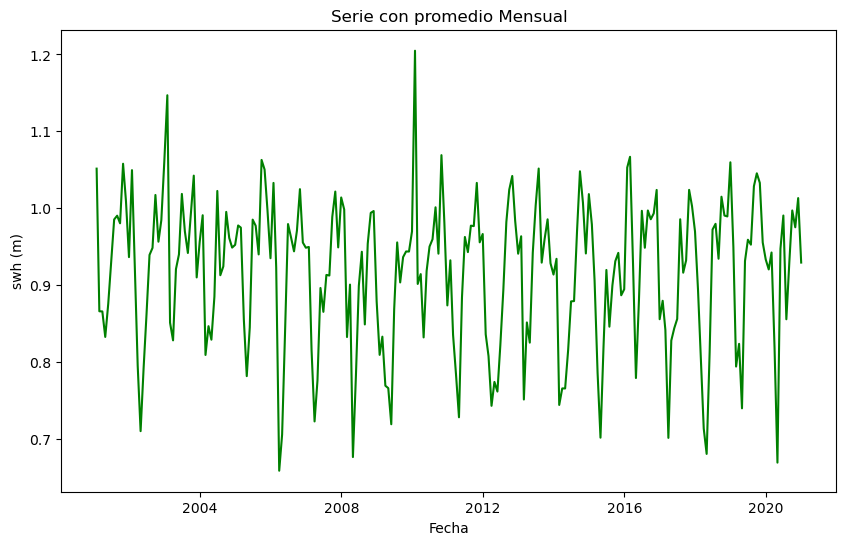

In [317]:
plt.figure(figsize=(10, 6))
plt.plot(promedio_mensual.index, promedio_mensual.values, label='Promedio Mensual', color='green')
plt.xlabel('Fecha')
plt.ylabel('swh (m)')
plt.title('Serie con promedio Mensual')
plt.show()

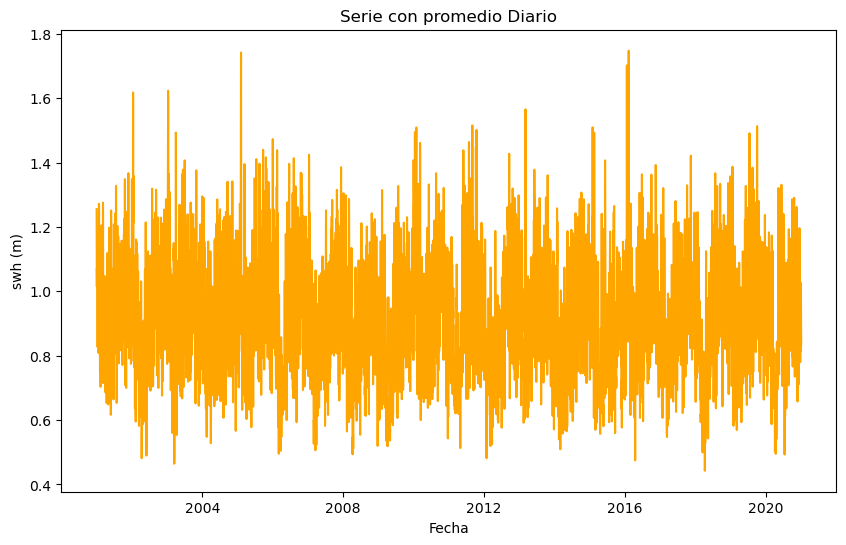

In [318]:
plt.figure(figsize=(10, 6))
plt.plot(promedio_diario.index, promedio_diario.values, label='Promedio Diario', color='orange')
plt.xlabel('Fecha')
plt.ylabel('swh (m)')
plt.title('Serie con promedio Diario')
plt.show()

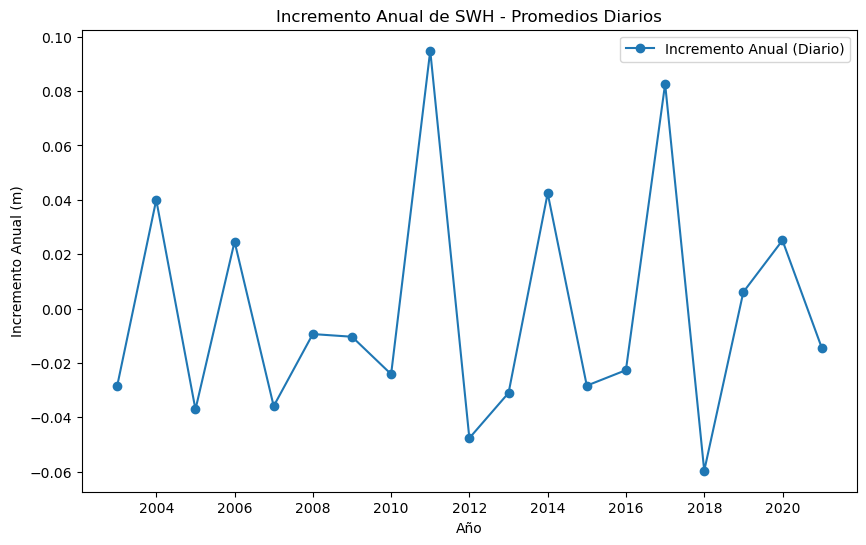

In [319]:
plt.figure(figsize=(10, 6))
plt.plot(promedio_anual_diario.index, incremento_anual_diario, marker='o', label='Incremento Anual (Diario)')
plt.title('Incremento Anual de SWH - Promedios Diarios')
plt.xlabel('Año')
plt.ylabel('Incremento Anual (m)')
plt.legend()
plt.show()


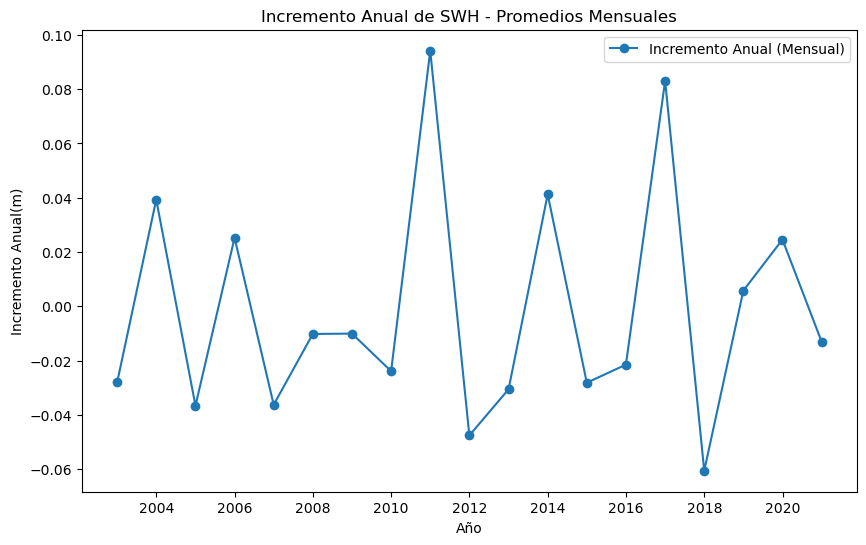

In [320]:
plt.figure(figsize=(10, 6))
plt.plot(promedio_anual_mensual.index, incremento_anual_mensual, marker='o', label='Incremento Anual (Mensual)')
plt.title('Incremento Anual de SWH - Promedios Mensuales')
plt.xlabel('Año')
plt.ylabel('Incremento Anual(m)')
plt.legend()
plt.show()

In [321]:
prob_acumulada = (seriee['swh'] - seriee['swh'].min()) / (seriee['swh'].max() - seriee['swh'].min())

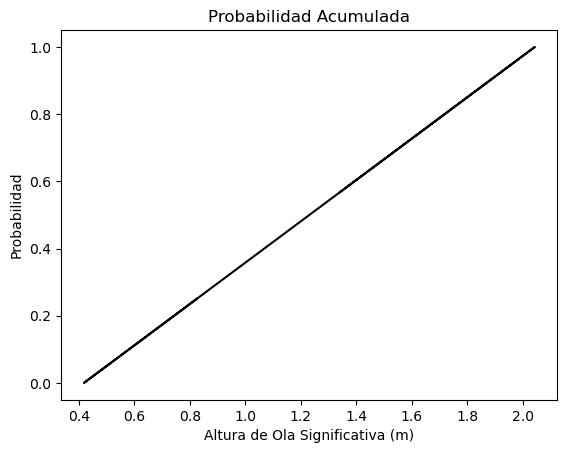

In [322]:
plt.plot(seriee['swh'], prob_acumulada.values, label='Promedio Diario', color='black')
plt.xlabel('Altura de Ola Significativa (m)')
plt.ylabel('Probabilidad')
plt.title('Probabilidad Acumulada')
plt.show()

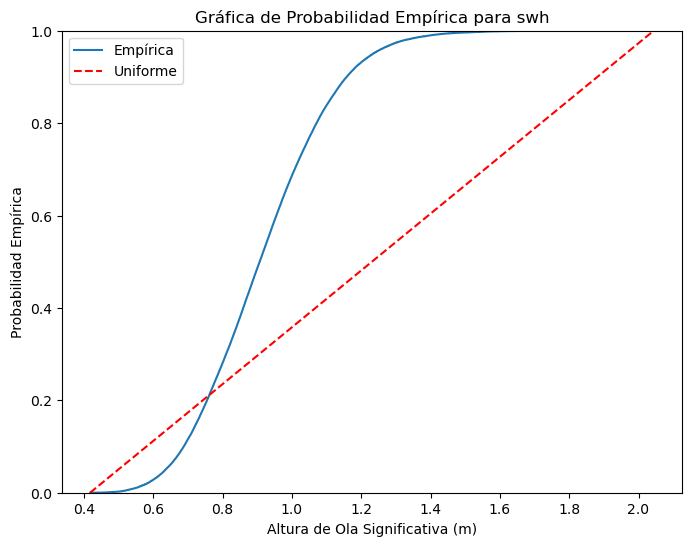

In [323]:
plt.figure(figsize=(8, 6))
sns.ecdfplot(seriee['swh'], label='Empírica')
plt.plot([min(seriee['swh']), max(seriee['swh'])], [0, 1], linestyle='--', color='red', label='Uniforme')
plt.title('Gráfica de Probabilidad Empírica para swh')
plt.xlabel('Altura de Ola Significativa (m)')
plt.ylabel('Probabilidad Empírica')
plt.legend()
plt.show()

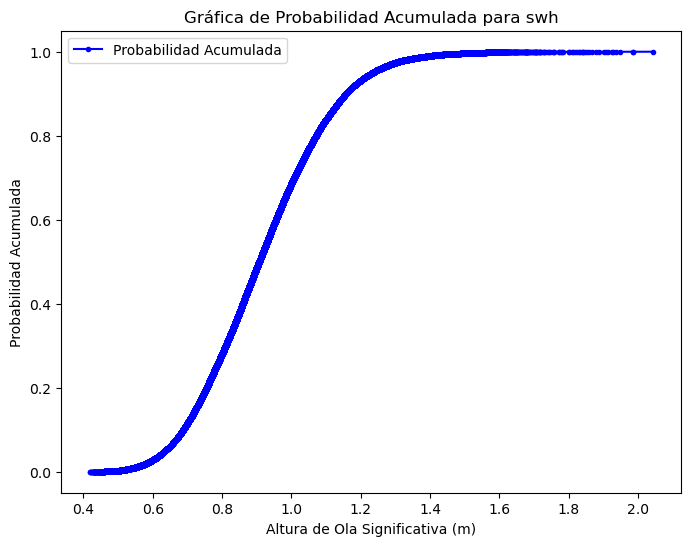

In [324]:
x = np.sort(seriee['swh'])
y = np.arange(1, len(x) + 1) / len(x)
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='.', linestyle='-', color='b', label='Probabilidad Acumulada')
plt.title('Gráfica de Probabilidad Acumulada para swh')
plt.xlabel('Altura de Ola Significativa (m)')
plt.ylabel('Probabilidad Acumulada')
plt.legend()
plt.show()

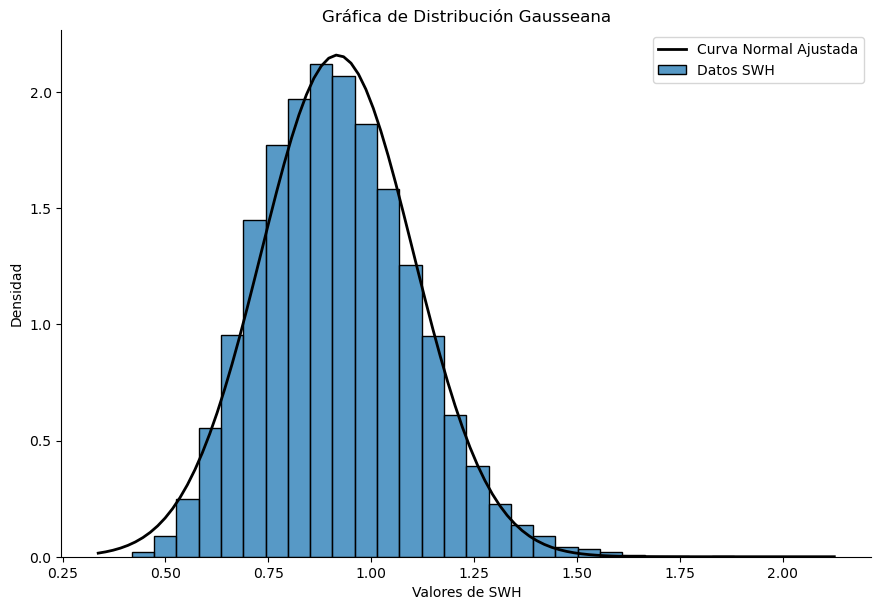

In [325]:
from scipy.stats import norm
sns.displot(seriee['swh'], bins=30, kde_kws={"bw_adjust": 1.5}, stat="density", label='Datos SWH', height=6, aspect=1.5)
mu, std = seriee['swh'].mean(), seriee['swh'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Curva Normal Ajustada')
plt.title('Gráfica de Distribución Gausseana')
plt.xlabel('Valores de SWH')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [326]:
from scipy.fft import fft
from scipy.fft import fftfreq
sst_ali = seriec['swh'].values.copy()
fft_resultt = fft(sst_ali)
frequencies = fftfreq(len(fft_resultt), seriec['tiempo'][1] - seriec['tiempo'][0])*86400

In [327]:
print(promedio_diario)

fecha
2001-01-01    1.255666
2001-01-02    1.089038
2001-01-03    1.014640
2001-01-04    1.072555
2001-01-05    1.048039
                ...   
2020-12-27    0.947938
2020-12-28    0.971731
2020-12-29    0.961885
2020-12-30    0.912026
2020-12-31    0.835647
Freq: D, Name: swh, Length: 7305, dtype: float64


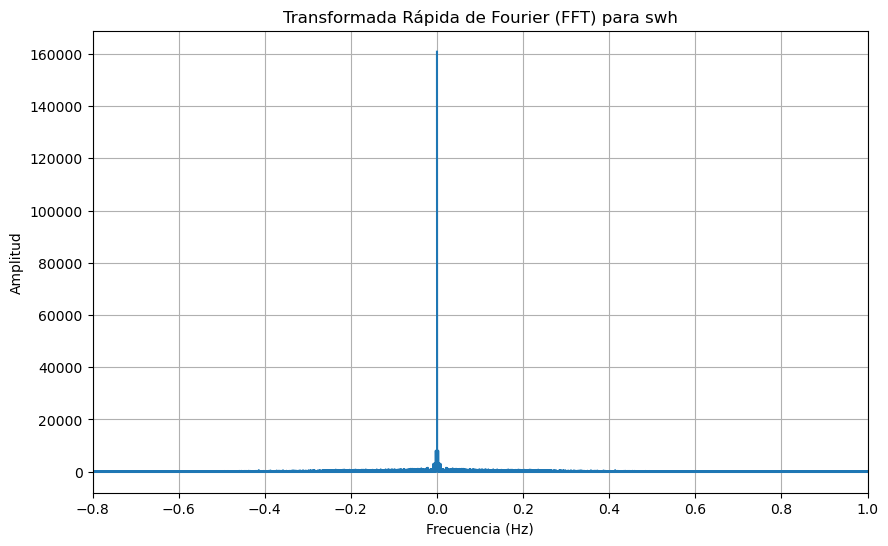

In [328]:
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(fft_resultt))
plt.title('Transformada Rápida de Fourier (FFT) para swh')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(-0.8,1)
plt.grid(True)
plt.show()

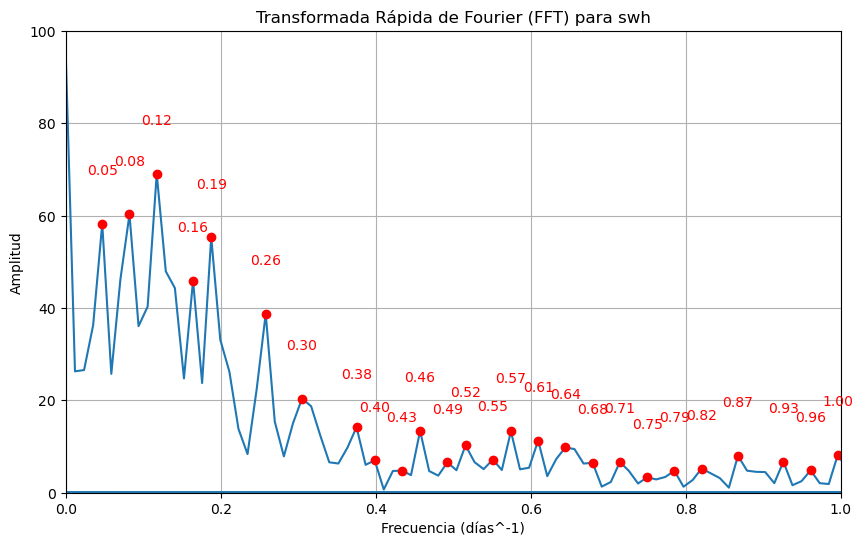

In [333]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(np.abs(fft_resultt))
plt.figure(figsize=(10, 6))
plt.plot(frequencies_in_days, np.abs(fft_resultt))
plt.plot(frequencies_in_days[peaks], np.abs(fft_resultt)[peaks], 'ro')  # Marcar picos en rojo
plt.title('Transformada Rápida de Fourier (FFT) para swh')
plt.xlabel('Frecuencia (días^-1)')
plt.ylabel('Amplitud')
plt.xlim(0, 1)
plt.ylim(0, 100)
plt.grid(True)
for peak in peaks:
    plt.annotate(f'{frequencies_in_days[peak]:.2f}', 
                 xy=(frequencies_in_days[peak], np.abs(fft_resultt)[peak]),
                 xytext=(frequencies_in_days[peak], np.abs(fft_resultt)[peak] + 10),
                 color='red', ha='center', va='bottom')

plt.show()

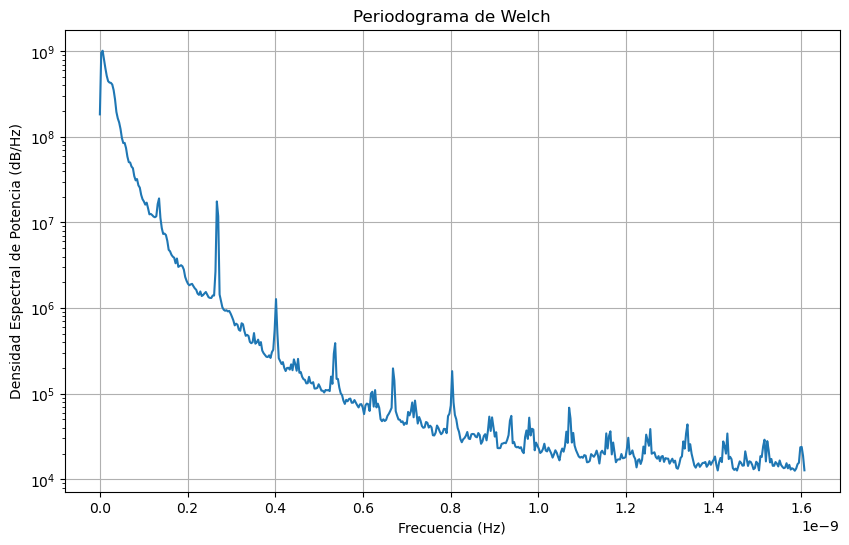

In [348]:
from scipy.signal import welch
fs = 1 / (seriec['tiempo'][1] - seriec['tiempo'][0]) 
frequencies, psd = welch(seriec['swh'], fs=fs/86400, nperseg=1024)
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia (dB/Hz)')
plt.title('Periodograma de Welch')
plt.grid(True)
plt.show()

In [346]:
print(anomalia)

0         0.363795
1         0.363869
2         0.359086
3         0.349570
4         0.337686
            ...   
175315   -0.125187
175316   -0.111265
175317   -0.104641
175318   -0.125887
175319   -0.126264
Name: swh, Length: 175320, dtype: float64


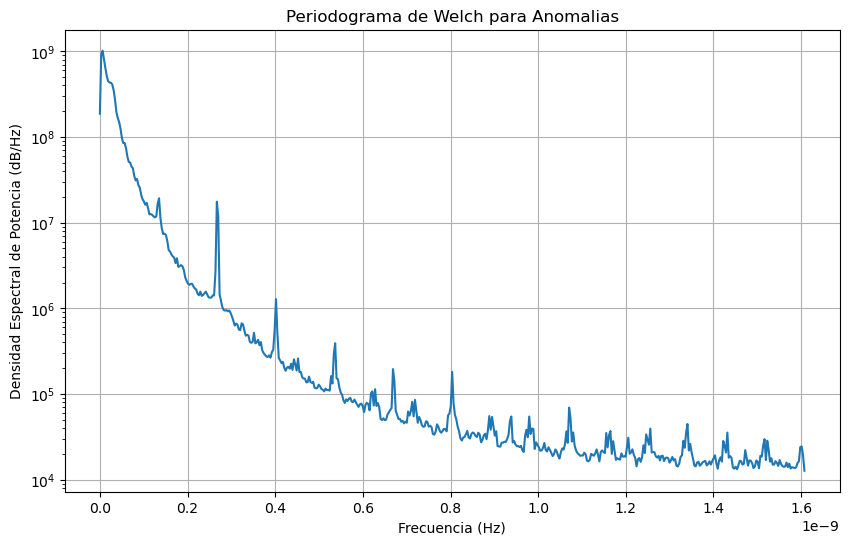

In [349]:
frequencies2, psd = welch(anomalia, fs=fs/86400, nperseg=1024)
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies2, psd)
plt.xlabel('Frecuencia (Hz)')
plt.grid(True)
plt.ylabel('Densidad Espectral de Potencia (dB/Hz)')
plt.title('Periodograma de Welch para Anomalias')
plt.show()

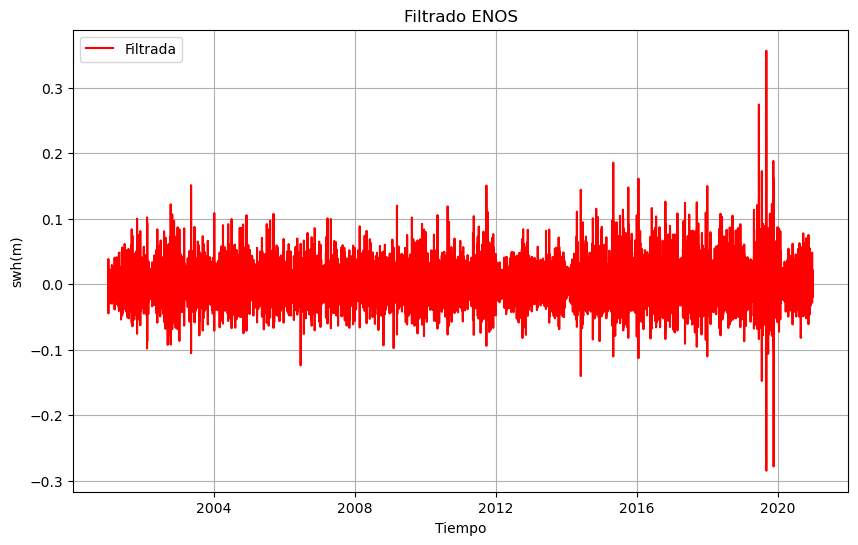

In [227]:
fft1 = np.fft.fft(seriec['swh'].values.copy())
fsst = seriec['swh']- signal.savgol_filter(seriec['swh'], window_length=15, polyorder=2)
plt.figure(figsize=(10, 6))

plt.plot(seriee['swh'].index, fsst, label='Filtrada', color='red')
plt.title('Filtrado ENOS')
plt.xlabel('Tiempo')
plt.ylabel('swh(m)')
plt.legend()
plt.grid(True)
plt.show()

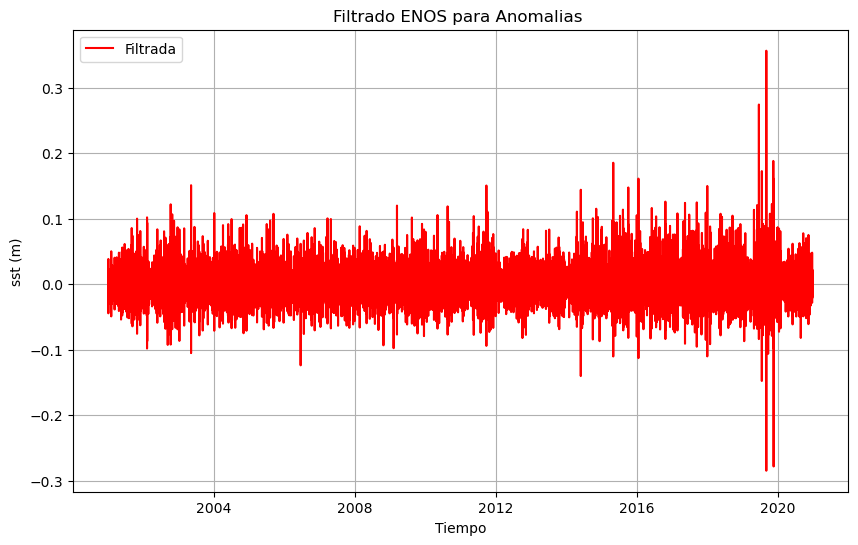

In [228]:
fssta = anomalia- signal.savgol_filter(anomalia, window_length=15, polyorder=2)
plt.figure(figsize=(10, 6))

plt.plot(seriee['swh'].index, fssta, label='Filtrada', color='red')
plt.title('Filtrado ENOS para Anomalias ')
plt.xlabel('Tiempo')
plt.ylabel('sst (m)')
plt.legend()
plt.grid(True)
plt.show()

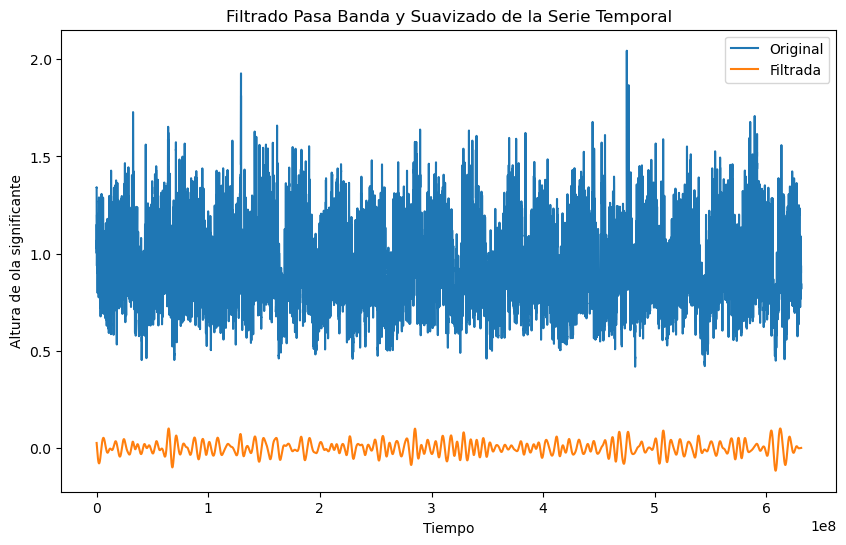

In [264]:
from scipy.signal import butter, filtfilt
#como se veria aplicando el filtro pasa banda 
swh = seriec['swh'].values
frecuencia_corte_baja = 1 / (4 * 365)  # 4 años
frecuencia_corte_alta = 1 / (2 * 365)  # 2 años
orden = 2
b, a = butter(orden, [frecuencia_corte_baja, frecuencia_corte_alta], btype='band')
swh_filtrada = filtfilt(b, a, swh)
swh_suavizada = signal.savgol_filter(swh_filtrada, window_length=11, polyorder=3)
plt.figure(figsize=(10, 6))
plt.plot(seriec['tiempo'], swh, label='Original')
plt.plot(seriec['tiempo'], swh_suavizada, label='Filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Altura de ola significante')
plt.title('Filtrado Pasa Banda y Suavizado de la Serie Temporal')
plt.legend()
plt.show()

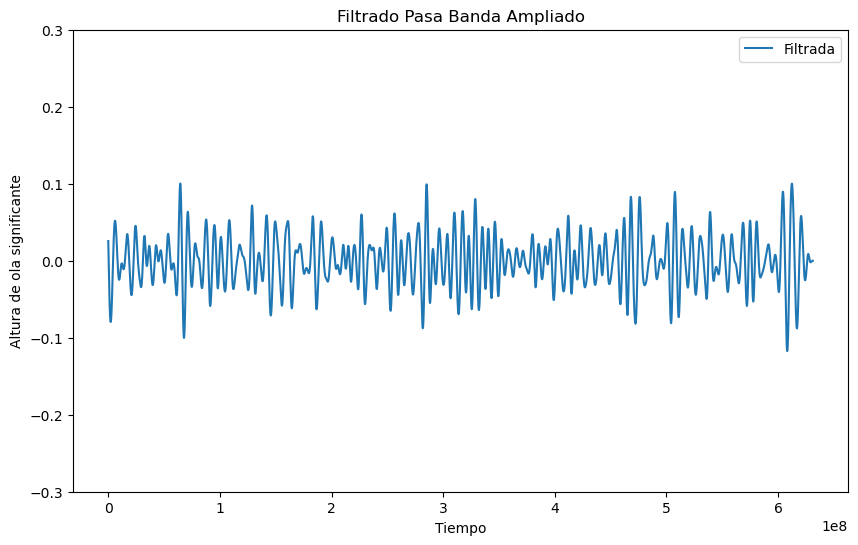

In [263]:
plt.figure(figsize=(10, 6))
plt.ylim(-0.3,0.3)
plt.plot(seriec['tiempo'], swh_suavizada, label='Filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Altura de ola significante')
plt.title('Filtrado Pasa Banda Ampliado')
plt.legend()
plt.show()